# Pattern Recognition - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from jupyterthemes import jtplot
jtplot.style()

import spacy
from collections import Counter
import cv2
import pandas as pd

### Question 1

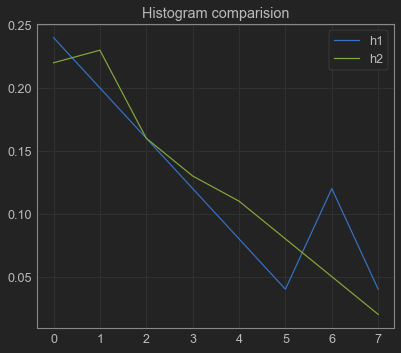

In [2]:
h1 = np.array([ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04])
h2 = np.array([ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02])

plt.plot(h1)
plt.plot(h2)
plt.title('Histogram comparision')
plt.legend(['h1','h2'])
plt.show()

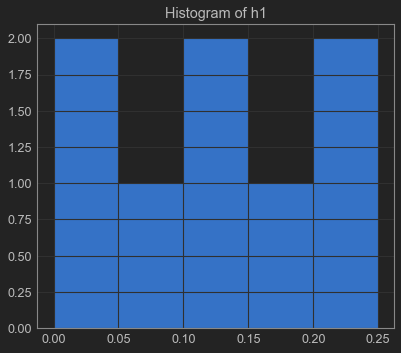

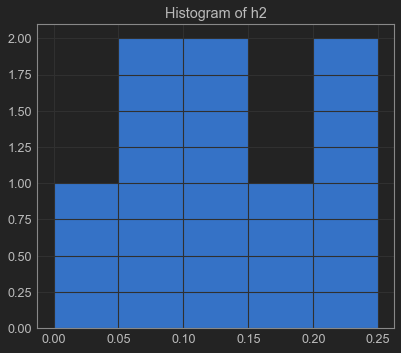

In [3]:
h1 = np.array([ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04])
h2 = np.array([ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02])

hist,bins = np.histogram(h1,bins = [0, 0.05, 0.1, 0.15, 0.2 , 0.25]) 

plt.hist(h1,bins = [0, 0.05, 0.1, 0.15, 0.2 , 0.25]) 
plt.title("Histogram of h1") 
plt.show()

plt.hist(h2,bins = [0, 0.05, 0.1, 0.15, 0.2 , 0.25]) 
plt.title("Histogram of h2") 
plt.show()

In [4]:
dpq = np.sum(h1 * np.log2(h1 / h2))
dqp = np.sum(h2 * np.log2(h2 / h1))

print('KL distance D(p||q) =', dpq)
print('KL distance D(q||p) =', dqp)

KL distance D(p||q) = 0.09075297258487514
KL distance D(q||p) = 0.08115679003357536


In [5]:
bd = -1 * np.log(np.sum(np.sqrt(h1 * h2)))

print('Bhattacharrya distance =', bd)

Bhattacharrya distance = 0.014830056106628986


### Question 2

In [6]:
ht = np.array([0.5, 0.5, -0.5, -0.25, -0.25])
h = ht.T

A = np.array([[1, 0.135, 0.195, 0.137, 0.157], [0.135, 1, 0.2, 0.309, 0.143], [0.195, 0.2, 1, 0.157, 0.122],
             [0.137, 0.309, 0.157, 1, 0.195], [0.157, 0.143, 0.122, 0.195, 1]])

MD = np.dot(np.dot(ht, A),h)
print('Mahalanobis distance =', MD)

Mahalanobis distance = 0.652625


### Quetion 3

In [7]:
doc1 = ('MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are vectors and matrices, so you must be familiar with these before making extensive use of this program.')
doc2 = ('MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic information on using MATLAB matrix commands.')
doc3 = (doc1 + doc2)

nlp = spacy.load('en_core_web_sm')

In [8]:
t1 = nlp(doc1)
words1 = [token.text for token in t1 if not token.is_punct]

t2 = nlp(doc2)
words2 = [token.text for token in t2 if not token.is_punct]

t3 = nlp(doc3)
words3 = [token.text for token in t3 if not token.is_punct]

In [9]:
w_count1 = Counter(words1)
w_freq1 = w_count1.most_common(len(w_count1))

w_count2 = Counter(words2)
w_freq2 = w_count2.most_common(len(w_count2))

w_count3 = Counter(words3)
w_freq3 = w_count3.most_common(len(w_count3))

In [10]:
ar1 = []
ar2 = []

for tups3 in w_freq3:
    wrd3 = tups3[0]
    count1 = 0
    count2 = 0
    
    for tups1 in w_freq1:
        wrd1 = tups1[0]
        if wrd1 == wrd3:
            count1 = tups1[1]
        
        for tups2 in w_freq2:
            wrd2 = tups2[0]
            if wrd2 == wrd3:
                count2 = tups2[1]
    
    ar1.append(count1)
    ar2.append(count2)
            
            

In [11]:
h1 = np.stack(ar1)
h2 = np.stack(ar2)

cos_sim = np.dot(h1,h2)/(np.linalg.norm(h1) * np.linalg.norm(h2))
cos_dis = 1 - cos_sim

print('Cosine similarity =', cos_sim)
print('Cosine distance =', cos_dis)

Cosine similarity = 0.28632814333910006
Cosine distance = 0.7136718566608999


#### Question 4

In [12]:
df = pd.read_csv('Iris_dataset.csv')
df.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [13]:
df = df.drop(['sepal.length', 'sepal.width'], axis = 1)
test = df.iloc[[0, 50, 100]]
train = df.drop(df.index[[0, 50, 100]])

In [14]:
train.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [15]:
class1 = train.loc[train.variety == 'Setosa']
class2 = train.loc[train.variety == 'Versicolor']
class3 = train.loc[train.variety == 'Virginica']

length_mean1 = np.mean(class1['petal.length'])
width_mean1 = np.mean(class1['petal.width'])
length_mean2 = np.mean(class2['petal.length'])
width_mean2 = np.mean(class2['petal.width'])
length_mean3 = np.mean(class3['petal.length'])
width_mean3 = np.mean(class3['petal.width'])

In [16]:
Z1 = np.array([class1['petal.length'] - length_mean1, class1['petal.width'] - width_mean1]).T
Z2 = np.array([class2['petal.length'] - length_mean2, class2['petal.width'] - width_mean2]).T
Z3 = np.array([class3['petal.length'] - length_mean3, class3['petal.width'] - width_mean3]).T

cov_mat1 = np.dot(Z1.T, Z1)/(len(class1)-1)
cov_mat2 = np.dot(Z2.T, Z2)/(len(class2)-1)
cov_mat3 = np.dot(Z3.T, Z3)/(len(class3)-1)

A1 = np.linalg.inv(cov_mat1)
A2 = np.linalg.inv(cov_mat2)
A3 = np.linalg.inv(cov_mat3)

In [17]:
categ = ['Setosa', 'Versicolor', 'Virginica']
for i in range(len(test)):
    
    print('Actual Class =', test.iloc[[i]]['variety'])
    
    l = test.iloc[[i]]['petal.length']
    w = test.iloc[[i]]['petal.width']
    
    right_mat1 = np.array([length_mean1 - l, width_mean1 - w])
    left_mat1 = right_mat1.T
    e1 = np.dot(np.dot(left_mat1, A1), right_mat1)
    print('Mahalanobis distance with class Setosa =',e1)
    
    right_mat2 = np.array([length_mean2 - l, width_mean2 - w])
    left_mat2 = right_mat2.T
    e2 = np.dot(np.dot(left_mat2, A2), right_mat2)
    print('Mahalanobis distance with class Versicolor =',e2)
    
    right_mat3 = np.array([length_mean3 - l, width_mean3 - w])
    left_mat3 = right_mat3.T
    e3 = np.dot(np.dot(left_mat3, A3), right_mat3)
    print('Mahalanobis distance with class Virginica =',e3)
    
    print('Predicted Class =', categ[np.argmin(np.array([e1, e2, e3]))])

Actual Class = 0    Setosa
Name: variety, dtype: object
Mahalanobis distance with class Setosa = [[0.24720611]]
Mahalanobis distance with class Versicolor = [[38.68858305]]
Mahalanobis distance with class Virginica = [[78.0886201]]
Predicted Class = Setosa
Actual Class = 50    Versicolor
Name: variety, dtype: object
Mahalanobis distance with class Setosa = [[366.65663738]]
Mahalanobis distance with class Versicolor = [[1.2782113]]
Mahalanobis distance with class Virginica = [[6.00678752]]
Predicted Class = Versicolor
Actual Class = 100    Virginica
Name: variety, dtype: object
Mahalanobis distance with class Setosa = [[850.42657551]]
Mahalanobis distance with class Versicolor = [[36.96256417]]
Mahalanobis distance with class Virginica = [[3.32372401]]
Predicted Class = Virginica


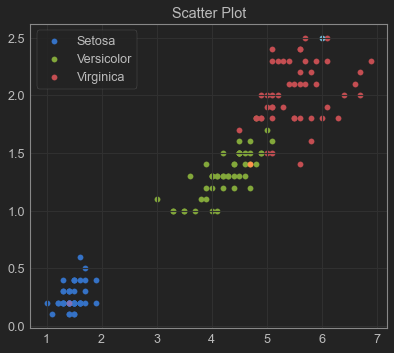

In [18]:
plt.scatter(x = class1['petal.length'], y = class1['petal.width'])
plt.scatter(x = class2['petal.length'], y = class2['petal.width'])
plt.scatter(x = class3['petal.length'], y = class3['petal.width'])

plt.title('Scatter Plot')
plt.scatter(x = test.iloc[[0]]['petal.length'], y = test.iloc[[0]]['petal.width'])
plt.scatter(x = test.iloc[[1]]['petal.length'], y = test.iloc[[1]]['petal.width'])
plt.scatter(x = test.iloc[[2]]['petal.length'], y = test.iloc[[2]]['petal.width'])
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

#### Question 5

In [19]:
Q = cv2.imread('Query_image.jpg', 0)
R1 = cv2.imread('Reference_image1.jpg', 0)
R2 = cv2.imread('Reference_image2.jpg', 0)

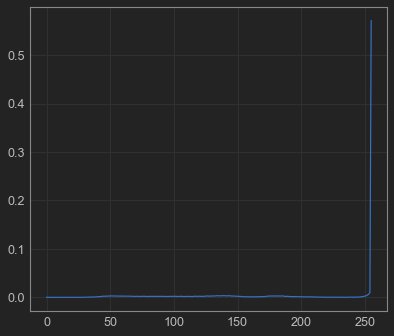

In [20]:
Q_hist = cv2.calcHist([Q],[0],None,[256],[0,256])  
Q_hist = Q_hist/(Q.shape[0] * Q.shape[1])

plt.plot(Q_hist) 
plt.show()

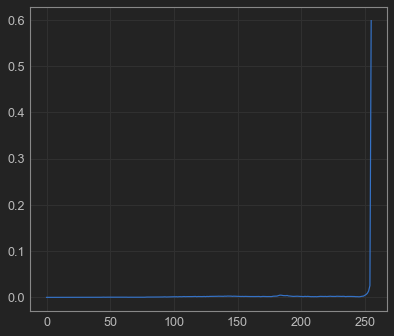

In [21]:
R1_hist = cv2.calcHist([R1],[0],None,[256],[0,256])  
R1_hist = R1_hist/(R1.shape[0] * R1.shape[1])

plt.plot(R1_hist) 
plt.show()

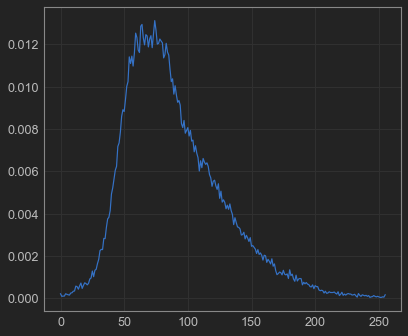

In [22]:
R2_hist = cv2.calcHist([R2],[0],None,[256],[0,256])  
R2_hist = R2_hist/(R2.shape[0] * R2.shape[1])

plt.plot(R2_hist) 
plt.show()

In [23]:
names = ['Reference Image 1', 'Reference Image 2']

In [24]:
L2_Q_R1 = np.array([[np.sqrt(np.sum(np.square(Q_hist - R1_hist)))]])
L2_Q_R2 = np.array([[np.sqrt(np.sum(np.square(Q_hist - R2_hist)))]])

print('L2 distance between Query image and Ref1 image :', L2_Q_R1.T[0])
print('L2 distance between Query image and Ref2 image :', L2_Q_R2.T[0])
print('According to L2 distance', names[np.argmin(np.array((np.sum(L2_Q_R1), np.sum(L2_Q_R2))))], 'is similar to Query Image')

L2 distance between Query image and Ref1 image : [0.03753511]
L2 distance between Query image and Ref2 image : [0.57521521]
According to L2 distance Reference Image 1 is similar to Query Image
